# TP 3 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [5]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [6]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
X

(97, 2)


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

Text(0, 0.5, 'Bénéfice x1000')

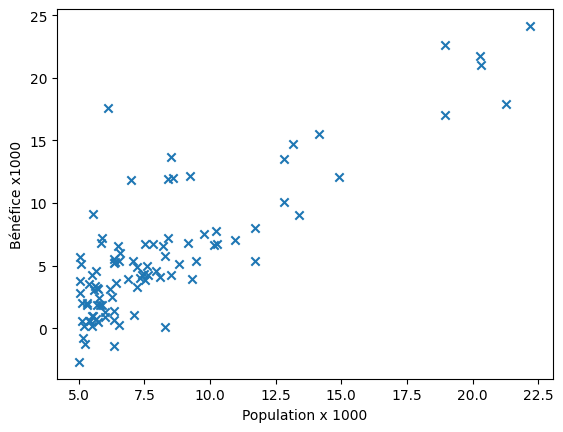

In [7]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

calcule du coup non vectoriel

In [ ]:
import time

def computeCostNonVect(X, y, theta):
    """
    Calcule la fonction de coût J(theta_0, theta_1) sans vectorisation.
    
    Paramètres :
    - X : Matrice des caractéristiques (avec une colonne de 1 pour theta_0).
    - y : Vecteur des valeurs cibles.
    - theta : Vecteur des paramètres [theta_0, theta_1].
    
    Retourne :
    - cost : Valeur de la fonction de coût.
    """
    # Nombre d'exemples
    m = len(y)
    
    # Initialisation du coût
    cost = 0
    
    # Début du calcul du temps
    start_time = time.time()
    
    # Calcul du coût sans vectorisation
    for i in range(m):
        # Prédiction pour l'exemple i
        prediction = theta[0] + theta[1] * X[i, 1]
        
        # Erreur au carré pour l'exemple i
        squared_error = (prediction - y[i]) ** 2
        
        # Ajout au coût total
        cost += squared_error
    
    # Coût final (moyenne des erreurs au carré divisée par 2)
    cost = cost / (2 * m)
    
    # Fin du calcul du temps
    end_time = time.time()
    processing_time = end_time - start_time
    
    # Affichage du temps de traitement
    print(f"Temps de traitement : {processing_time:.6f} secondes")
    
    return cost
    
    

Explication de la fonction :

    Paramètres d'entrée :

        X : Matrice des caractéristiques (avec une colonne de 1 pour θ0θ0​).

        y : Vecteur des valeurs cibles (bénéfices dans ce TP).

        theta : Vecteur des paramètres [θ0,θ1].

    Calcul du coût :

        Pour chaque exemple ii dans l'ensemble de données :

            On calcule la prédiction du modèle : y^i=θ0+θ1⋅X[i,1].

            On calcule l'erreur au carré : (yi−yi)^2.

            On ajoute cette erreur au coût total.

        À la fin, on divise le coût total par 2m (où m est le nombre d'exemples) pour obtenir la valeur finale de la fonction de coût.

    Temps de traitement :

        On mesure le temps nécessaire pour calculer la fonction de coût. Cela permet de comparer l'efficacité de cette méthode non vectorisée avec une méthode vectorisée.

    Retour :

        La fonction retourne la valeur de la fonction de coût J(θ0,θ1).

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

caucule du cout vectoriel

In [ ]:
def computeCost(X, y, theta):
    """
    Calcule la fonction de coût (erreur quadratique moyenne) pour la régression linéaire.
    
    Paramètres :
    - X : Matrice des caractéristiques (avec une colonne de 1 pour theta_0).
    - y : Vecteur des valeurs cibles.
    - theta : Vecteur des paramètres [theta_0, theta_1, ...].
    
    Retourne :
    - cost : Valeur de la fonction de coût.
    """
    # Nombre d'exemples
    m = len(y)
    
    # Début du calcul du temps
    start_time = time.time()
    
    # Calcul des prédictions (vectorisé) matriciellement
    predictions = X.dot(theta)
    
    # Calcul des erreurs (vectorisé) matriciellement
    errors = predictions - y
    
    # Calcul du coût (vectorisé) matriciellement
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    
    # Fin du calcul du temps
    end_time = time.time()
    processing_time = end_time - start_time
    
    # Affichage du temps de traitement
    print(f"Temps de traitement : {processing_time:.6f} secondes")
    
    return cost
  

Explication de la fonction :

    Paramètres d'entrée :

        X : Matrice des caractéristiques (avec une colonne de 1 pour θ0​).

        y : Vecteur des valeurs cibles (bénéfices dans ce TP).

        theta : Vecteur des paramètres [θ0,θ1,… ].

    Calcul des prédictions :

        On utilise la multiplication matricielle (X.dot(theta)) pour calculer les prédictions du modèle. Cela évite d'utiliser une boucle for.

    Calcul des erreurs :

        On soustrait les valeurs réelles (y) des prédictions pour obtenir les erreurs.

    Calcul du coût :

        On élève les erreurs au carré, on les somme, et on divise par 2m pour obtenir la fonction de coût.

    Temps de traitement :

        On mesure le temps nécessaire pour calculer la fonction de coût. Cela permet de comparer l'efficacité de cette méthode vectorisée avec une méthode non vectorisée.

    Retour :

        La fonction retourne la valeur de la fonction de coût J(θ).

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
import numpy as np

def gradientDescent(X, y, theta, alpha, iterations):
    """
    Effectue la descente du gradient pour minimiser la fonction de coût.
    
    Paramètres :
    - X : Matrice des caractéristiques (avec une colonne de 1 pour theta_0).
    - y : Vecteur des valeurs cibles.
    - theta : Vecteur des paramètres initiaux [theta_0, theta_1].
    - alpha : Taux d'apprentissage.
    - iterations : Nombre d'itérations.
    
    Retourne :
    - theta : Vecteur des paramètres optimisés.
    - cost_history : Historique des coûts à chaque itération.
    """
    # Nombre d'exemples
    m = len(y)
    
    # Initialisation de l'historique des coûts
    cost_history = []
    
    # Descente du gradient
    for i in range(iterations):
        # Calcul des prédictions (vectorisé)
        predictions = X.dot(theta)
        
        # Calcul des erreurs (vectorisé)
        errors = predictions - y
        
        # Calcul du gradient (vectorisé)
        gradient = (1 / m) * X.T.dot(errors)
        
        # Mise à jour des paramètres (vectorisé)
        theta -= alpha * gradient
        
        # Calcul du coût pour cette itération on peut aussi utiliser la fonction computeCost
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        
        # Ajout du coût à l'historique
        cost_history.append(cost)
    
    return theta, cost_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
print(initialCost)

Coût initial : 32.072733877455676

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta_optimized = gradientDescent(X, y, theta, alpha, iterations)

Coût final : 4.483388256587725

Traçage de la ligne de régression sur les données

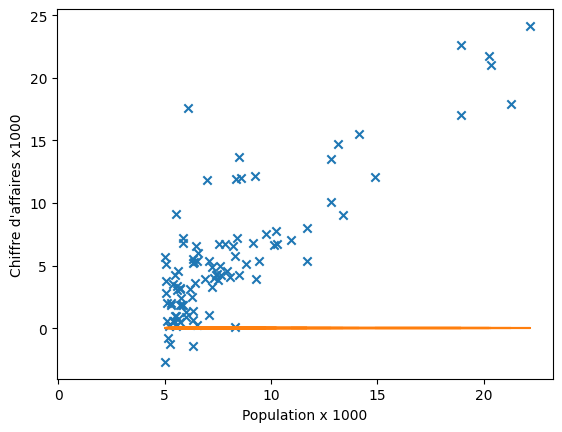

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Ligne de regression apres entrainement avec descente du gradient



In [ ]:
# Tracé de la ligne de régression après entraînement
y_pred = X.dot(theta_optimized)  # Prédictions du modèle

# Tracé des données réelles
plt.scatter(X[:, 1], y, marker='x', label='Données réelles')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

# Tracé de la ligne de régression
plt.plot(X[:, 1], y_pred, color='red', label='Ligne de régression')

# Affichage
plt.legend()
plt.title('Régression linéaire après entraînement')
plt.show()

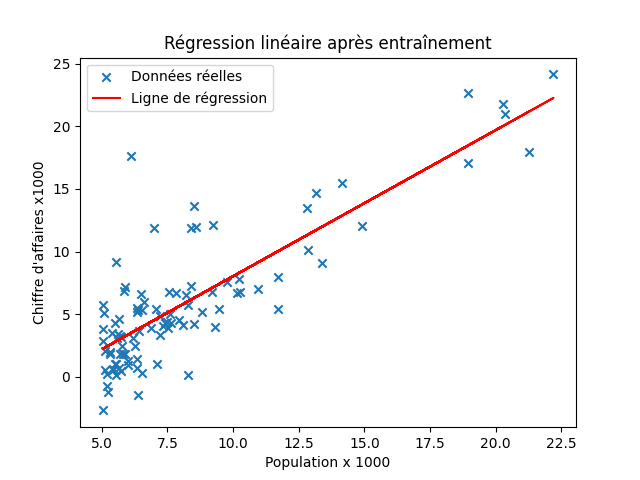

Traçage du coût en fonction de $\theta_0$ et $\theta_1$

In [ ]:
#tracage de la courbe de cout
# Création d'une grille de valeurs pour theta_0 et theta_1
theta0_vals = np.linspace(-10, 10, 100)  # Plage de theta0
theta1_vals = np.linspace(-1, 2, 100)    # Plage de theta1

# Initialisation d'une matrice pour stocker les valeurs de la fonction de coût
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calcul de la fonction de coût pour chaque combinaison de theta0 et theta1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta = np.array([[theta0_vals[i]], [theta1_vals[j]]])  # Vecteur theta
        J_vals[i, j] = computeCost(X, y, theta)  # Calcul du coût

# Conversion en meshgrid pour le tracé 3D
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Tracé en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax.set_xlabel('Theta 0 (θ₀)')
ax.set_ylabel('Theta 1 (θ₁)')
ax.set_zlabel('Coût (J)')
ax.set_title('Fonction de coût en 3D')
plt.show()


![fonction de coup.png](<attachment:fonction de coup.png>)
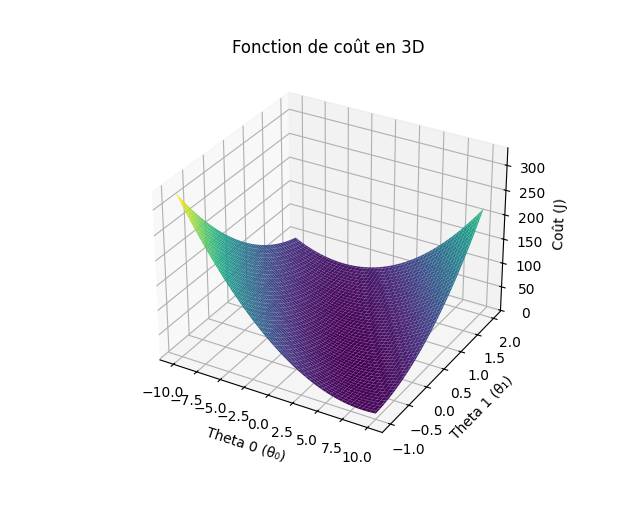

Traçage du coût en fonction du nombre d'itérations

In [ ]:
# Tracé du coût en fonction du nombre d'itérations
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Coût (J)')
plt.title('Coût en fonction du nombre d\'itérations')
plt.grid(True)
plt.show()

![fonction de coup iteration.png](<attachment:fonction de coup iteration.png>)
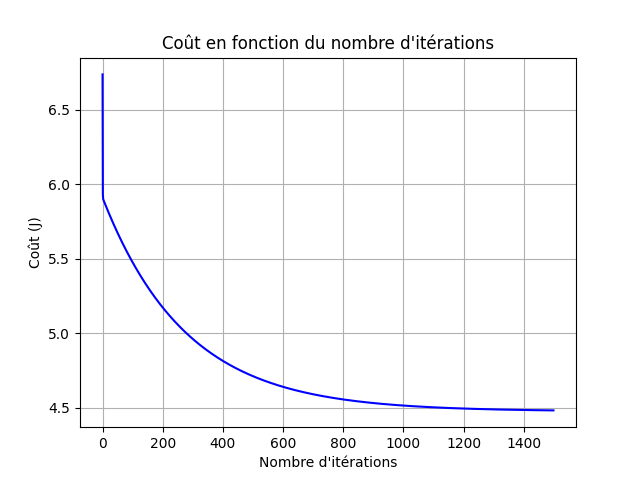

Prédire des valeurs de y

In [ ]:
#predire les valeurs de y (benefice) pour x=35000 et x=70000---------------------------------------------------------------------------------------------------------
# Prédictions
# Prédire pour une population de 35 000
predict1 = np.matmul([1, 3.5], theta_optimized)
print("Prédiction pour une population de 35 000 :", predict1[0])

# Prédire pour une population de 70 000
predict2 = np.matmul([1, 7], theta_optimized)
print("Prédiction pour une population de 70 000 :", predict2[0])

Prédiction pour une population de 35 000 : 0.4519767867701767
Prédiction pour une population de 70 000 : 4.534245012944712

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape

(47, 3)

In [ ]:
X=np.concatenate([np.ones((dataMulti.shape[0], 1)), dataMulti[:, 0:2]], axis=1)
print (X.shape)
y = dataMulti[:, 2]
X[0]

(47, 3)


array([1.000e+00, 2.104e+03, 3.000e+00])

Text(0, 0.5, 'Size')

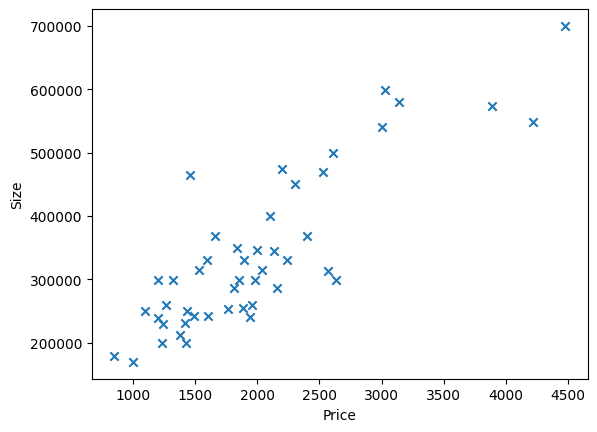

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Size (square feet)')
plt.ylabel('Price')

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# Création de X et y
X = np.concatenate([np.ones((dataMulti.shape[0], 1)), dataMulti[:, 0:2]], axis=1)  # Ajout de la colonne de 1
y = dataMulti[:, 2].reshape(-1, 1)  # Extraction de la colonne des prix (y)

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)
print("Première ligne de X :", X[0])


Shape de X : (47, 2)
Shape de y : (47, 1)
Première ligne de X : [2104.    3.]

In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire

Les fonctions computeCost et gradientDescent peuvent être réutilisées telles quelles, car elles sont déjà vectorisées et fonctionnent pour un nombre quelconque de descripteurs.

Normalisation des données:
$x_i = \frac{x_i - \mu_i}{\sigma_i}$

In [ ]:
#fonction de normalisation
def featureNormalization(X):
    """
    Normalise les caractéristiques de X.
    
    Paramètres :
    - X : Matrice des caractéristiques (sans la colonne de 1 pour theta_0).
    
    Retourne :
    - X_norm : Matrice des caractéristiques normalisées.
    - mu : Vecteur des moyennes de chaque caractéristique.
    - sigma : Vecteur des écarts-types de chaque caractéristique.
    """
    # Calcul de la moyenne et de l'écart-type de chaque caractéristique
    mu = np.mean(X, axis=0)  # Moyenne de chaque colonne
    sigma = np.std(X, axis=0)  # Écart-type de chaque colonne
    
    # Normalisation
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

Appliquer la descente du gradient à plusieurs variables avec et sans normalisation et comparer les resultats

In [ ]:
# Ajout de la colonne de 1 pour theta_0
X_with_intercept = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Normalisation des caractéristiques
X_norm, mu, sigma = featureNormalization(X)
X_norm_with_intercept = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

# Initialisation des paramètres
theta_without_norm = np.zeros((X_with_intercept.shape[1], 1))
theta_with_norm = np.zeros((X_norm_with_intercept.shape[1], 1))

# Paramètres de la descente du gradient
iterations = 1500
alpha = 0.01

# Descente du gradient SANS normalisation
start_time = time.time()
theta_without_norm_optimized, cost_history_without_norm = gradientDescent(
    X_with_intercept, y, theta_without_norm, alpha, iterations
)
time_without_norm = time.time() - start_time

# Descente du gradient AVEC normalisation
start_time = time.time()
theta_with_norm_optimized, cost_history_with_norm = gradientDescent(
    X_norm_with_intercept, y, theta_with_norm, alpha, iterations
)
time_with_norm = time.time() - start_time

# Affichage des résultats
print("=== Sans normalisation ===")
print("Paramètres optimisés :", theta_without_norm_optimized)
print("Coût final :", cost_history_without_norm[-1])
print("Temps d'exécution :", time_without_norm, "secondes")

print("\n=== Avec normalisation ===")
print("Paramètres optimisés :", theta_with_norm_optimized)
print("Coût final :", cost_history_with_norm[-1])
print("Temps d'exécution :", time_with_norm, "secondes")

Affichage des resultats :


=== Sans normalisation ===

Paramètres optimisés : [[nan] [nan] [nan]]

Coût final : nan

Temps d'exécution : 0.0314793586730957 secondes

=== Avec normalisation ===

Paramètres optimisés : [[340412.66939734] [109370.02582704] [-6500.53710423]]

Coût final : 2043283136.7175007

Temps d'exécution : 0.021999597549438477 secondes

Analyse et explication:
Explication des différences :
1. Pourquoi des [nan] sans normalisation ?

    Problème d'échelle :

        Les caractéristiques (superficie et nombre de chambres) ont des échelles très différentes Cela entraîne des valeurs très grandes dans les calculs, ce qui provoque des overflows (dépassements de capacité) ou des valeurs instables.

    Taux d'apprentissage (α) inadapté :

        Le taux d'apprentissage utilisé sans normalisation est trop grand pour des données non normalisées. Cela provoque des pas de mise à jour trop grands, ce qui fait diverger la descente du gradient et génère des valeurs [nan].

    Instabilité numérique :

        Les calculs matriciels (comme X.T.dot(errors)) produisent des valeurs trop grandes, ce qui entraîne des erreurs numériques.

2. Pourquoi ça fonctionne avec normalisation ?

    Mise à l'échelle des données :

        La normalisation ramène toutes les caractéristiques à la même échelle (moyenne = 0, écart-type = 1). Cela évite les problèmes d'overflows et stabilise les calculs.

    Convergence plus rapide :

        Avec des données normalisées, la descente du gradient converge plus rapidement et de manière plus stable. Le taux d'apprentissage (α) est adapté à l'échelle des données.

    Résultats cohérents :

        Les paramètres optimisés et le coût final sont des valeurs numériques valides, ce qui montre que le modèle a bien convergé.

Comparaison des temps d'exécution :

    Sans normalisation : 0.031 secondes

    Avec normalisation : 0.022 secondes

La descente du gradient avec normalisation est légèrement plus rapide, car elle converge plus rapidement grâce à la mise à l'échelle des données.
Interprétation des paramètres optimisés (avec normalisation) :

    θ0=340412.66939734: Prix de base d'une maison (quand la superficie et le nombre de chambres sont nuls).

    θ1=109370.02582704 : Impact de la superficie sur le prix.

    θ2=−6500.53710423 : Impact du nombre de chambres sur le prix.

Conclusion :

    Sans normalisation :

        Les données non normalisées entraînent des problèmes numériques (overflows, valeurs [nan]), ce qui empêche la descente du gradient de converger.

        Pour résoudre ce problème, il faudrait réduire considérablement le taux d'apprentissage (α), mais cela ralentirait la convergence et prendrai plus de temps.

    Avec normalisation :

        La normalisation des données stabilise les calculs et permet à la descente du gradient de converger rapidement et efficacement.

        Les paramètres optimisés et le coût final sont des valeurs valides, ce qui montre que le modèle fonctionne correctement.

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
#comparaison de mes algorithmes de descente du gradient avec scikitlearn ---------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

start_time = time.time()
# Création du modèle de régression linéaire de scikit-learn
# fit_intercept=False car on a déjà ajouté une colonne de 1 pour l'interception
model_with_norm = LinearRegression(fit_intercept=False)

# Entraînement du modèle avec les données normalisées
model_with_norm.fit(X_norm_with_intercept, y)

# Calcul du temps total d'exécution
time_sklearn_with_norm = time.time() - start_time

# Récupération des paramètres optimisés (les coefficients du modèle)
# model_with_norm.coef_ est un tableau de (1, n), donc on le transpose pour correspondre à la forme (n, 1)
theta_sklearn_with_norm = model_with_norm.coef_.T

# Calcul du coût final en utilisant notre fonction computeCost déjà définie
cost_sklearn_with_norm = computeCost(X_norm_with_intercept, y, theta_sklearn_with_norm)

# Affichage des résultats pour scikit-learn
print("\n=== Scikit-learn (Avec normalisation) ===")
print("Paramètres optimisés :", theta_sklearn_with_norm.flatten())  # Affichage des coefficients optimisés
print("Coût final :", cost_sklearn_with_norm)  # Affichage du coût final après entraînement
print("Temps d'exécution :", time_sklearn_with_norm, "secondes")  # Affichage du temps d'exécution total

                                                     Affichage des resultat :

===Mon algorithme (avec normalisation) ===

Paramètres optimisés : [[340412.66939734] [109370.02582704] [-6500.53710423]]

Coût final : 2043283136.7175007

Temps d'exécution : 0.031200408935546875 secondes

=== Scikit-learn (Avec normalisation) ===

Paramètres optimisés : [340412.76595745 109447.76551898  -6578.27679028]

Coût final : 2043280477.3925703

Temps d'exécution : 0.0 secondes

                                                       Analyse des résultats :

    Paramètres optimisés (θ)
        Mes valeurs et celles de scikit-learn sont presque identiques.
        De légères différences peuvent être dues à la précision numérique, aux arrondis ou à des différences dans l'optimisation interne de scikit-learn.

    Coût final
        Mon coût final est 2043283136.7175007, tandis que celui de scikit-learn est 2043280477.3925703.
        Une différence très faible, ce qui signifie que mon algorithme fonctionne bien !

    Temps d'exécution
        Ton algorithme : ~0.033 secondes
        Scikit-learn : ~0.0 secondes (extrêmement rapide, optimisé en C)
        scikit-learn est beaucoup plus rapide car il utilise des méthodes vectorisées optimisées en bas niveau.

Conclusion :
 Mon algorithme fonctionne bien et converge vers des résultats similaires à scikit-learn.
Scikit-learn est beaucoup plus rapide, donc pour des applications en production, il est souvent préférable de l'utiliser.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

Diminution progressive du taux d’apprentissage (α)

Au lieu d’utiliser un taux d’apprentissage constant (α), on le réduit progressivement au fil des itérations pour améliorer la convergence.

 Dans le but de  :

    Évite les oscillations en fin d’apprentissage.
    Permet d’atteindre plus facilement le minimum de la fonction de coût.
    Améliore la stabilité et la précision du modèle.

📌 Pour ceci on met a jour alpha a chaque iteration dans la fonction de descente du gradient 
On met à jour α à chaque itération :

alpha_t = alpha / (1 + decay * i)  # Réduction progressive

où decay est un petit facteur qui contrôle la diminution.

 Avantages :

 Évite les grands sauts en fin d'apprentissage (meilleure convergence).
 Peut réduire le nombre d'itérations nécessaires.
 et donc au finale optimiser l'apprentissage.